<center><img src="VL09_Material/datascience_roles.jpg" width="50%" />
<div class="smallfont">Quelle: LinkedIn (dies ist eine Meinungsäußerung einer Einzelperson, keine unumstößliche Definition!)</div></center>

**Rollen im Projektteam:**

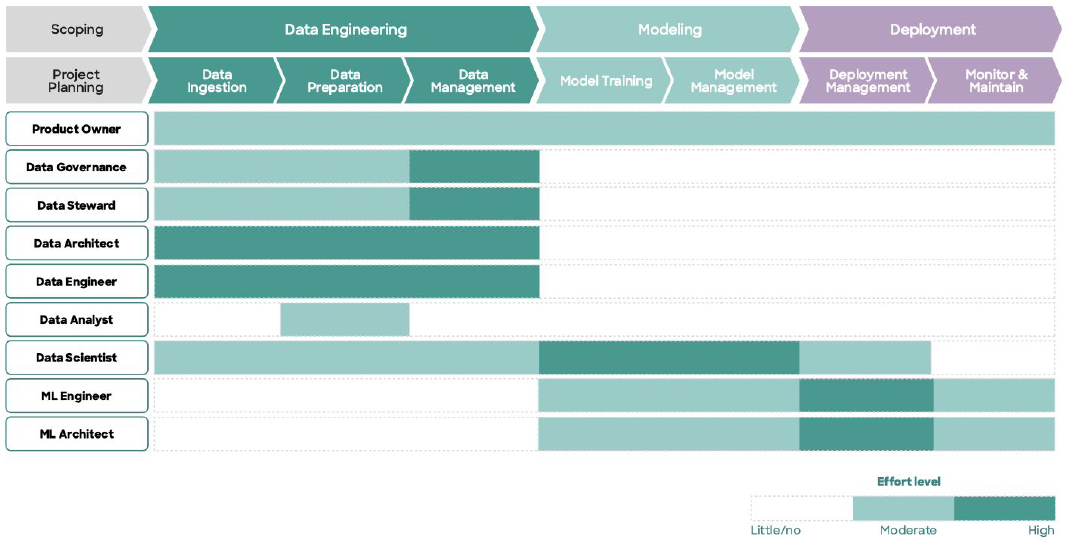

<div class="tinyfont">Bildquelle: AppliedAI Initiative GmbH</div>

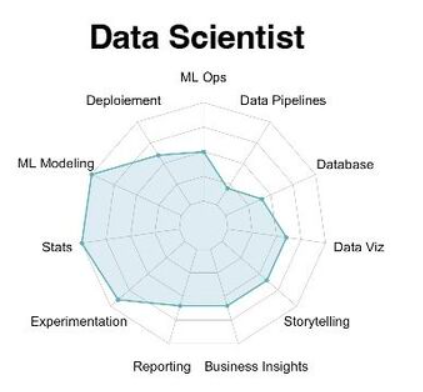

# <div style="color:blue;">1. Numpy</div>
# <div>2. Best practices der Informationsvisualisierung</div>
# <div>3. Korrelation</div>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### 1.1 Erstellung von Arrays

In [134]:
# Erstellung eines Arrays
M = np.array ( [0,1,2,3,4,5,6,7] )
M, M.dtype


(array([0, 1, 2, 3, 4, 5, 6, 7]), dtype('int32'))

In [22]:
# Parameter dtype zur Spezifikation des Datentyps
M = np.array ( [0,1,2,3,4,5,6,7], dtype="float" )
M, M.dtype


(array([0., 1., 2., 3., 4., 5., 6., 7.]), dtype('float64'))

Zugriff auf Array-Elemente via Slicing:

In [35]:
# Slicing notation: M[from (incl):to (exkl):step]
M[0], M[3:]



(0.0, array([3., 4., 5., 6., 7.]))

In [1]:
# Ergebnis?
M[1:-1:2]


In [27]:
M[1:-1:2]

array([1., 3., 5.])

Mehrdimensionale Arrays:


In [136]:
M = np.array ( [[0,1,2,3],[4,5,6,7]] )
M


array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [88]:
# (Anzahl Zeilen, Anzahl Spalten)
M.shape


(2, 4)

Modifikation von Array-Größen:

In [89]:
M.reshape ( 4,2 )


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [2]:
# Ergebnis?
M.reshape( 2,2,2 )


Umgang mit mehrdimensionalen Arrays:

In [95]:
# Reihenfolge veränderbar mit order-Parameter="C"/"F"
M = M.reshape( 2,2,2 )
M


array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [96]:
# Zugriff auf einen zweidimensionalen Slice
M[0,:,:]


array([[0, 1],
       [2, 3]])

In [97]:
# Hinzufügen einer Dummy-Dimension
M.reshape(1,2,2,2)


array([[[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]]])

Rank-agnostische Notation (z.B. um Deep Learning-Architekturen robuster zu machen bzgl. der Input-Dimension):

In [98]:
# Code ist korrekt für verschiedene Ranks
M[0,...]


array([[0, 1],
       [2, 3]])

In [99]:
# Hinzufügen einer Dummy-Dimension, Alternative
M[np.newaxis,...]


array([[[[0, 1],
         [2, 3]],

        [[4, 5],
         [6, 7]]]])

In [10]:
M = np.array([[[0, 1],[2, 3]], [[4, 5], [6, 7]]])
M


array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [4]:
# Ergebnis?
M.shape, M[np.newaxis,...].shape


In [11]:

M.shape, M[np.newaxis,...].shape


((2, 2, 2), (1, 2, 2, 2))

In [5]:
# Ergebnis?
M[:,np.newaxis,...,np.newaxis].shape


In [12]:

M[:,np.newaxis,...,np.newaxis].shape


(2, 1, 2, 2, 1)

### 1.2 Boolean und integer array indexing

In [28]:
M = np.array( range(12) ).reshape(2,2,3)
M


array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [32]:
# äquivalent zu M[[1],...]
M[ [False,True] ]


array([[[ 6,  7,  8],
        [ 9, 10, 11]]])

In [39]:
# Frage: Äquivalent zu ...?
M[:, [False,True] ]


array([[[ 3,  4,  5]],

       [[ 9, 10, 11]]])

In [120]:
# Vorsicht: Anzahl Klammern (=Rank) stimmt nicht 
M[ :, 1, :]


array([[ 3,  4,  5],
       [ 9, 10, 11]])

In [121]:
# Äquivalent zum M[:, [False,True] ]
M[:, [1], :]


array([[[ 3,  4,  5]],

       [[ 9, 10, 11]]])

Integer array indexing:

In [16]:
M = np.array( range(12) ).reshape(2,2,3)
M


array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]]])

In [125]:
# Integer array indexing
M[..., [0,2] ]


array([[[ 0,  2],
        [ 3,  5]],

       [[ 6,  8],
        [ 9, 11]]])

In [6]:
# Frage: äquivalent umschreiben via Boolean Indexing?
M[..., ? ]

In [17]:
M[...,[True,False,True]]

array([[[ 0,  2],
        [ 3,  5]],

       [[ 6,  8],
        [ 9, 11]]])


### 1.3 Typische Array-Initialisierungen

In [162]:
np.zeros ( (3,3) )


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [160]:
np.zeros_like( M )


array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]]])

In [161]:
np.ones( (3,3) )


array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [130]:
np.identity(3)


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [159]:
# Parameter von (inkl.), bis (inkl.), Anzahl
np.linspace(0,1,11)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [164]:
# Parameter von (inkl.), bis (exkl.), Schrittweite
np.arange(0,1,0.1)


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Zufallszahlen in Numpy:

In [48]:
# Uniform verteilte Zufallsvariablen,
# d.h. gleichwahrscheinlich verteilt auf [0,1]
np.random.random ( (2,2) )


array([[0.17124968, 0.02549659],
       [0.89033287, 0.60060419]])

In [45]:
# Best practice: Random Number Generator
# (für Reproduzierbarkeit)
R = np.random.default_rng ( seed=42 )
R.random ( (2,2) )


array([[0.77395605, 0.43887844],
       [0.85859792, 0.69736803]])

### 1.4 Erweiterte Funktionalität

In [51]:
np.array([1,2,3]).min()



1

In [7]:
# Ergebnis?
np.minimum ( [1,2,3], [10,-10,0] )


In [18]:
np.minimum ( [1,2,3], [10,-10,0] )
# => Komponentenweises Minimum.
# Vergleich linkes mit rechtem Array

array([  1, -10,   0])

Numpy bietet viele weitere Funktionen, z.B. `np.where`:

In [65]:
# ternary operator in Python: 
10 if 1 < 2 else 20



10

In [8]:
# vektorisiert: np.where(condition, then, else)
np.where( [True,False,False], [1,2,3], np.nan )
# Ergebnis?


In [19]:
np.where( [True,False,False], [1,2,3], np.nan )

array([ 1., nan, nan])

In [53]:
# Verwendung zur Indexsuche (vgl. argmax in der Mathematik oder idxmax bei Pandas)
xrange = np.linspace ( 0,2,21 )
np.where( np.sin(xrange) > 0.99 ) # Achtung: Rückgabewert ist ein Tupel!


(array([15, 16, 17], dtype=int64),)

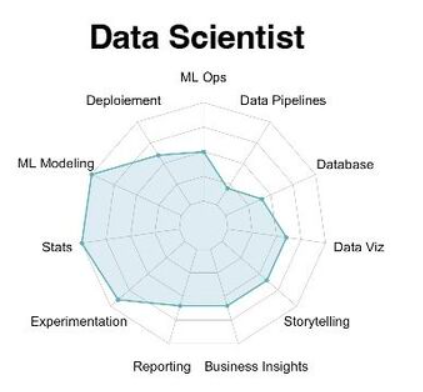

# <div>1. Numpy</div>
# <div style="color:blue;">2. Best practices der Informationsvisualisierung</div>
# <div>3. Korrelation</div>

### 2.1 Best practices
<br>
<div class="alert alert-block alert-warning"><b>Frage:</b> Was macht eine gute Datenvisualisierung aus?</div>

**"Principles of Effective Data Visualization"**
<div class="smallfont">Stephen R. Midway, Principles of Effective Data Visualization,
Patterns, Volume 1, Issue 9, 2020.<br>
https://www.sciencedirect.com/science/article/pii/S2666389920301896</div>
<br><br>
<img src="VL05_Material/10tips.jpg" width="110%" />

<br><br>
<img src="VL05_Material/10tips_plots.jpg" width="80%" />

**"Ten Simple Rules for Better Figures"**

<div class="tinyfont">Rougier NP, Droettboom M, Bourne PE: Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9). 2014<br>
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833</div>

&nbsp;
1. Know your audience
2. Identify your message
3. Adapt the figure to the support medium
4. Captions are not optional
5. Do not trust the defaults
6. Use color effectively
7. Do not mislead the reader
8. Avoid chartjunk
9. Message trumps beauty
10. Get the right tool


**1. Know your audience**

<img src="VL05_Material/tenrules_audience.png" width="90%" />

Leicht zugängliche Darstellung für die New York Times.

In einem wissenschaftlichen Kontext wäre zu bemängeln, dass numerische Vergleiche schwierig sind.

**"Ten Simple Rules for Better Figures"**

<div class="tinyfont">Rougier NP, Droettboom M, Bourne PE: Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9). 2014<br>
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833</div>

&nbsp;
1. Know your audience
2. Identify your message
3. Adapt the figure to the support medium
4. Captions are not optional
5. Do not trust the defaults
6. Use color effectively
7. Do not mislead the reader
8. Avoid chartjunk
9. Message trumps beauty
10. Get the right tool

**3. Adapt the figure to the support medium**

<img src="VL05_Material/tenrules_adapt.png">

**Links:** Im Fachartikel hat der Leser viel Zeit, sich in die Details einzuarbeiten.

**Rechts:** Bei einem Vortrag kann der Zuhörer nur wenige Elemente aufnehmen.

**"Ten Simple Rules for Better Figures"**

<div class="tinyfont">Rougier NP, Droettboom M, Bourne PE: Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9). 2014<br>
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833</div>

&nbsp;
1. Know your audience
2. Identify your message
3. Adapt the figure to the support medium
4. Captions are not optional
5. Do not trust the defaults
6. Use color effectively
7. Do not mislead the reader
8. Avoid chartjunk
9. Message trumps beauty
10. Get the right tool

**5. Do not trust the defaults**

<img src="VL05_Material/tenrules_defaults.png">

**Links:** matplotlib defaults

**Rechts:** Bessere Darstellung mit manuellem Aufwand

**"Ten Simple Rules for Better Figures"**

<div class="tinyfont">Rougier NP, Droettboom M, Bourne PE: Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9). 2014<br>
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833</div>

&nbsp;
1. Know your audience
2. Identify your message
3. Adapt the figure to the support medium
4. Captions are not optional
5. Do not trust the defaults
6. Use color effectively
7. Do not mislead the reader
8. Avoid chartjunk
9. Message trumps beauty
10. Get the right tool

**7. Do not mislead the reader**

<img src="VL05_Material/tenrules_mislead.png">

**Links:** Größendarstellung via **Flächeninhalt** oder via **<span style="color:red">Radius.</span>**

**Rechts:** Größenvergleich **bei Höhe 0 beginnend** bzw. **<span style="color:red">unteren Teil abgeschnitten.</span>**

Im linken Bild ist ein Verhältnis 3:1 visualisiert.

**"Ten Simple Rules for Better Figures"**

<div class="tinyfont">Rougier NP, Droettboom M, Bourne PE: Ten Simple Rules for Better Figures. PLoS Comput Biol 10(9). 2014<br>
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833</div>

&nbsp;
1. Know your audience
2. Identify your message
3. Adapt the figure to the support medium
4. Captions are not optional
5. Do not trust the defaults
6. Use color effectively
7. Do not mislead the reader
8. Avoid chartjunk
9. Message trumps beauty
10. Get the right tool

**8. Avoid chartjunk**

<img src="VL05_Material/tenrules_chartjunk.png">

**Links:** Viele unnötige Bildelemente ("chartjunk")

**Rechts:** Reduktion aufs Wesentliche, Verwendung von Panels ("use small multiples")

### 2.2 Zusammenfassung

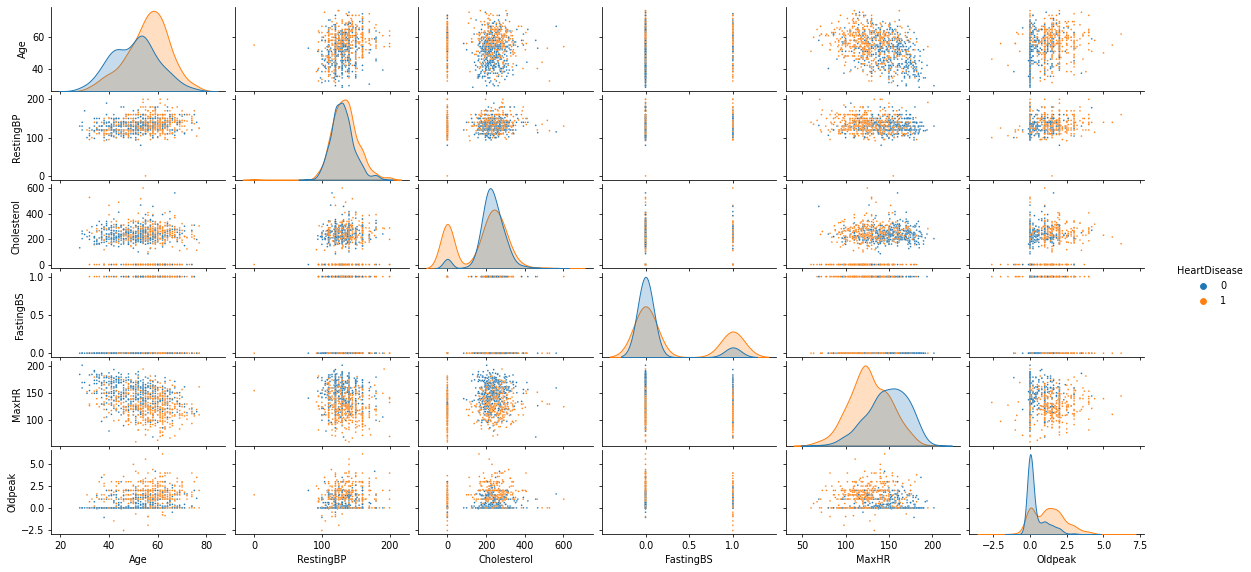

In [6]:
# Gute Darstellung für das Ziel "Überblick verschaffen"
df = pd.read_csv("VL02_Material/heart.csv")
sns.pairplot ( df, hue="HeartDisease", plot_kws={"s":3} )
plt.gcf().set_size_inches ( 18, 8 ); plt.gcf().set_dpi(70);


Für eine gute Visualisierung braucht es 1) Klarheit bzgl. der Zielgruppe, 2) eine Message, 3) eine reduzierte Darstellung.

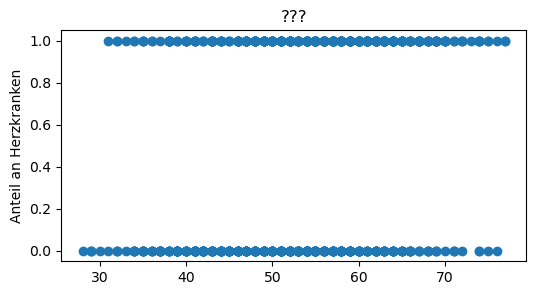

In [166]:
# erster Versuch ...

fig, ax = plt.subplots ( figsize=(6,3) )
ax.scatter ( df["Age"], df["HeartDisease"] )

ax.set_ylabel("Anteil an Herzkranken")
ax.set_title("???");


Für eine gute Visualisierung braucht es 1) Klarheit bzgl. der Zielgruppe, 2) eine Message, 3) eine reduzierte Darstellung.

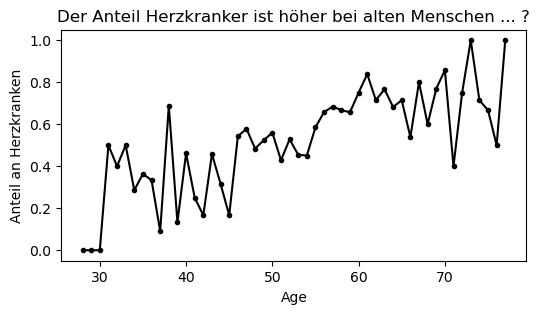

In [168]:
# zweiter Versuch ...

# Mit .groupby können nach der gruppierte Spalte zusammengefasst werden.
# mit marker="." wird deutlich gemacht, dass Daten vergröbert vorliegen.
fig, ax = plt.subplots ( figsize=(6,3) )
df.groupby("Age")["HeartDisease"].mean().plot(marker=".", ax=ax, color="black")

# Die Aussage gilt erst einmal nur "... in diesem Datensatz". Hier nehmen wir zusätzlich an, dass dieser repräsentativ ist.
ax.set_ylabel("Anteil an Herzkranken")
ax.set_title("Der Anteil Herzkranker ist höher bei alten Menschen ... ?");

Für eine gute Visualisierung braucht es 1) Klarheit bzgl. der Zielgruppe, 2) eine Message, **3) eine reduzierte Darstellung.**

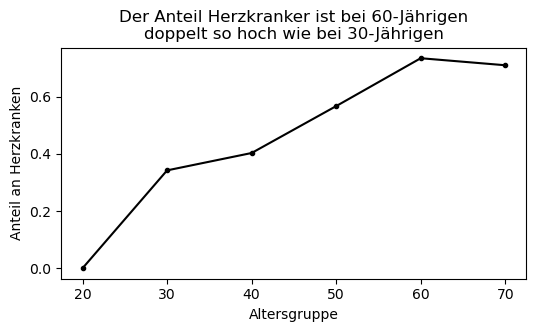

In [57]:
# Vergröbere die Darstellung: ... 8 -> 0, 9 -> 0, 10 -> 10, 11 -> 10, 12 -> 10, ...
df["Altersgruppe"] = (df["Age"]//10)*10 

# Mit .groupby können nach der gruppierte Spalte zusammengefasst werden.
# mit marker="." wird deutlich gemacht, dass Daten vergröbert vorliegen.
fig, ax = plt.subplots ( figsize=(6,3) )
df.groupby("Altersgruppe")["HeartDisease"].mean().plot(marker=".", ax=ax, color="black")

# Die Aussage gilt erst einmal nur "... in diesem Datensatz". Hier nehmen wir zusätzlich an, dass dieser repräsentativ ist.
ax.set_ylabel("Anteil an Herzkranken")
ax.set_title("Der Anteil Herzkranker ist bei 60-Jährigen\ndoppelt so hoch wie bei 30-Jährigen");


**Grundsätze:**
- Zielgruppe definieren ("know your audience")
- Kernaussage herausarbeiten ("identify your message")
- passende Darstellungsform wählen ("use the correct geometry, consider showing the data")
- Kernaussage kurz und prägnant im Titel widerspiegeln ("include a detailed, standalone caption")
- Bildelemente und Achsen korrekt labeln, hierbei Annotationen direkt im Plot gegenüber einer Legende bevorzugen ("Captions are not optional")
- Die Aufmerksamkeit auf die wichtigen Bildelemente lenken ("use color effectively", aber auch Größe der Elemente, umliegender Whitespace, ...)

**Danach:**
- Reduzieren
- Reduzieren
- Reduzieren  
("avoid chartjunk")

&nbsp;  

**Dabei immer hinterfragen:**
- Bleibt die intendierte Message erhalten?  
("message trumps beauty")
- Wird die Aussage der Daten versehentlich verfälscht?  
("do not mislead the reader")


In [ ]:
![image-2.png](attachment:image-2.png)

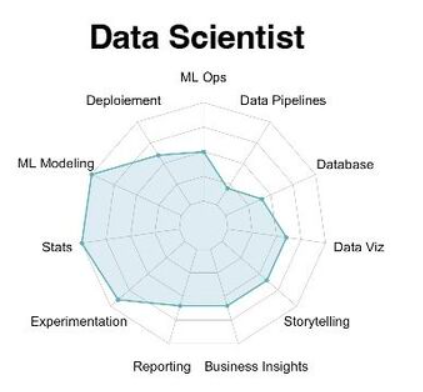

# <div>1. Numpy</div>
# <div>2. Best practices der Informationsvisualisierung</div>
# <div style="color:blue;">3. Korrelation</div>

In [75]:
# Numpy-Skalarprodukt u.T @ v (oder u @ u) ist eine Abkürzung für (u*u).sum():
np.array([1,2,3]).T @ np.array([4,5,6])


32

In [76]:
# äquivalent zu ...
1*4 + 2*5 + 3*6

32

### 3.1 Winkelmessung im $\mathbb{R}^d$
**Erinnerung:** Für den Winkel $W(u,v)$ zwischen zwei Vektoren $u,v$ der Länge $1$ gilt die Formel 
$$
\cos (W(u,v)) = <u,v>\ ,
$$
wobei $<u,v>=\sum_{i=1}^d u_i v_i$ das Skalarprodukt zwischen $u$ und $v$ beschreibt.

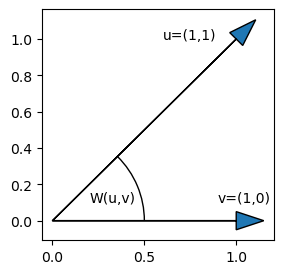

In [49]:
from matplotlib.patches import Arc
plt.arrow(x=0,y=0,dx=1,dy=1,head_width=0.1)
plt.text(s="u=(1,1)", x=0.6,y=1.0)
plt.arrow(x=0,y=0,dx=1,dy=0,head_width=0.1)
plt.text(s="v=(1,0)", x=0.9,y=0.1);
plt.gca().add_patch (
    Arc( (0,0), width=1, height=1, angle=0,
         theta1=0, theta2=45) )
plt.text(s="W(u,v)", x=0.2,y=0.1)
plt.gcf().set_size_inches(3,3);

In [42]:
# Winkel zwischen u=(1,1) und v(1,0)?
# (es sollte pi/4 = 0,7... herauskommen)
u=np.array([1,1])
v=np.array([1,0])
W = np.arccos ( u.T @ v )
W

# Was machen wir falsch?

0.0

**Erinnerung:** Für den Winkel $W(u,v)$ zwischen zwei Vektoren $u,v$ <span style="color:orange">mit positiver Länge</span> gilt die Formel 
$$
\cos (W(u,v)) = \frac{<u,v>}{ \color{orange}{\lVert u \rVert \cdot \lVert v \rVert}}
$$
wobei $<u,v>=\sum_{i=1}^d u_i v_i$ das Skalarprodukt und <span style="color:orange">$\lVert u \rVert=\sqrt{<u,u>}$ die Länge des Vektors beschreibt.</span>

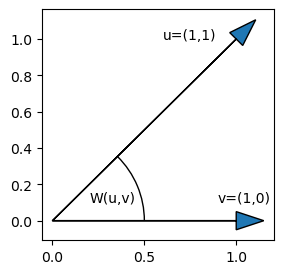

In [49]:
from matplotlib.patches import Arc
plt.arrow(x=0,y=0,dx=1,dy=1,head_width=0.1)
plt.text(s="u=(1,1)", x=0.6,y=1.0)
plt.arrow(x=0,y=0,dx=1,dy=0,head_width=0.1)
plt.text(s="v=(1,0)", x=0.9,y=0.1);
plt.gca().add_patch (
    Arc( (0,0), width=1, height=1, angle=0,
         theta1=0, theta2=45) )
plt.text(s="W(u,v)", x=0.2,y=0.1)
plt.gcf().set_size_inches(3,3);

In [51]:
# Winkel zwischen u=(1,1) und v(1,0):
u=np.array([1,1])
v=np.array([1,0])
np.arccos ( u.T@v / (np.sqrt(u.T@u)*np.sqrt(v.T@v)) )

0.7853981633974484

In [53]:
# Der Winkel wird in "Radianten" gemessen:
winkel_in_rad = np.arccos (
    u.T@v / (np.sqrt(u.T@u)*np.sqrt(v.T@v)) )

# 2 pi entspricht 360°, daher:
winkel_in_grad = winkel_in_rad/(2*np.pi)*360
winkel_in_grad

45.00000000000001

In [40]:
# Alternative
np.rad2deg ( winkel_in_rad )

45.00000000000001

Berechnung des Quotienten $Q=<u,v>/(\lVert u \rVert \lVert v \rVert)$ für verschiedene Winkel:

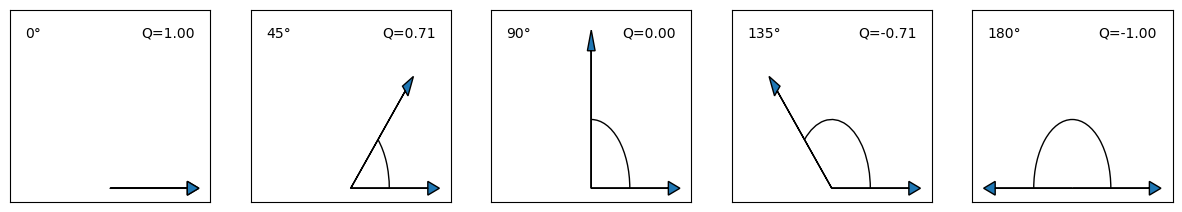

In [77]:
fig,axes = plt.subplots ( figsize=(15,2.5), ncols=5 )
for winkel,ax in zip([0,45,90,135,180],axes):
    u = np.array ( [np.cos(np.deg2rad(winkel)), np.sin(np.deg2rad(winkel))] )
    v = np.array ( [1,0] )
    ax.arrow(x=0,y=0,dx=u[0],dy=u[1],head_width=0.1)
    ax.arrow(x=0,y=0,dx=v[0],dy=v[1],head_width=0.1)
    ax.add_patch ( Arc( (0,0), width=1, height=1, angle=0, theta1=0, theta2=winkel) )
    ax.set_xlim ( -1.3,1.3 ); ax.set_ylim ( -0.1,1.3 )
    ax.set_xticks([]);        ax.set_yticks([])
    ax.text ( s=str(winkel)+"°", x=-1.1, y=1.1 )
    ax.text ( s="Q={0:.2f}".format( u.T@v / (np.sqrt(u.T@u)*np.sqrt(v.T@v)) ), x= 1.1, y=1.1, ha="right" )

<div class="alert alert-block alert-info">
    <b>Intuition:</b> Das Konzept des Winkels kann auf Datenvektoren übertragen werden und heißt dann <i>Korrelation</i>. Insb. sollten Datenvektoren zu sich selber Korrelation 1 haben, unabhängige Datenvektoren sollten Korrelation 0 haben.
</div>

### 3.2 Die Pearson-Korrelation

In [107]:
# Erinnerung: Das Skalarprodukt zwischen zwei
# normierten Vektoren liefert den Winkel:
# <u, v> = |u| |v| cos(Winkel zwischen u und v)

u = np.array([1,0])
v = np.array([0,1])
w = np.array([0,-1])

# => Die Vektoren u, v, w zeigen in die gleiche
#    Richtung wie sie selber: cos(0°) = 1
u @ u, v @ v, w @ w


(1, 1, 1)

In [110]:
# Die Vektoren u und v stehen im
# rechten Winkel zueinander: cos(90°) = 0
u @ v


0

In [112]:
# Schlussendlich:
# Die Vektoren v und w zeigen in entgegengesetzte
# Richtung: cos(180°)= -1
v @ w


-1

Es seien Datenvektoren $x=(x_1,...,x_n)$ und $y=(y_1,...,y_n)$ gleicher Länge $n \ge 2$ gegeben.
- Die (empirische) **Kovarianz** ist definiert via
$$
\text{cov}(x,y) = \frac{1}{n-1} \sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})
$$

- Die (empirische) **Pearson-Korrelation** ist definiert via
$$
\text{cor}(x,y) = \frac{\text{cov}(x,y)}{\text{sd}(x) \text{sd}(y)} = \frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n (x_i-\overline{x})^2} \sqrt{\sum_{i=1}^n (y_i-\overline{y})^2}}
$$

<div class="alert alert-block alert-warning">
<b>Frage:</b> Was hat sich hier verändert im Vergleich zur Winkelberechnung zwischen Vektoren?
</div>

<div class="alert alert-block alert-success">

**Antwort:**  
- Die Vektoren wurden *zentriert*, d.h. der Mittelwert wird komponentenweise subtrahiert.
- Konsequenz: Die Skalierung geschieht nicht mehr durch die (geometrische) Länge, sondern durch die Standardabweichung ("*Standardisierung*").

</div>

Die Korrelation ist ein gutes Maß für den **linearen** Zusammenhang:
<br><br>
<center>
<img src="VL10_Material/correlation.png" width="60%" />
<div class="tinyfont">https://en.wikipedia.org/wiki/Correlation</div>
</center>
<br><br>
Insbesondere impliziert i.A. Korrelation=0 nicht die Unabhängigkeit (Abwesenheit von Kausalität) zwischen zwei Datenquellen. 

### 3.3 Beispiel

In [82]:
# Der sklearn diabetes-Datensatz
from sklearn.datasets import load_diabetes
X = load_diabetes(as_frame=True)

# Daten extrahieren
X,y = X["data"], X["target"]
df = pd.concat([X,y],axis=1)

# .T zum transponieren (spiegeln)
# (hier verwendet, um alle Spalten zu sehen)
df.head().T

,0,1,2,3,4
age,0.038076,-0.001882,0.085299,-0.089063,0.005383
sex,0.050680,-0.044642,0.050680,-0.044642,-0.044642
bmi,0.061696,-0.051474,0.044451,-0.011595,-0.036385
bp,0.021872,-0.026328,-0.005670,-0.036656,0.021872
s1,-0.044223,-0.008449,-0.045599,0.012191,0.003935
s2,-0.034821,-0.019163,-0.034194,0.024991,0.015596
s3,-0.043401,0.074412,-0.032356,-0.036038,0.008142
s4,-0.002592,-0.039493,-0.002592,0.034309,-0.002592
s5,0.019907,-0.068332,0.002861,0.022688,-0.031988
s6,-0.017646,-0.092204,-0.025930,-0.009362,-0.046641


Features s1-s6 sind diverse Blutwerte:

| Spalte | Beschreibung |
|--------|--------------|
age | age in years
sex | sex
bmi | body mass index
bp | average blood pressure
s1 | tc, total serum cholesterol
s2 | ldl, low-density lipoproteins
s3 | hdl, high-density lipoproteins
s4 | tch, total cholesterol / HDL
s5 | ltg, possibly log of serum triglycerides level
s6 | glu, blood sugar level
target | a quantitative measure of disease progression one year after baseline

> Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples

<div class="tinyfont">https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset</div>

In [100]:
# Anzeige der Korrelationen mit Pandas
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [105]:
# Anzeige der Korrelationen mit Numpy
np.corrcoef( df.T )

array([[ 1.        ,  0.1737371 ,  0.18508467,  0.33542759,  0.26006082,
         0.21924314, -0.07518097,  0.2038409 ,  0.27077424,  0.30173101,
         0.18788875],
       [ 0.1737371 ,  1.        ,  0.0881614 ,  0.24101049,  0.03527682,
         0.14263726, -0.37908963,  0.33211509,  0.14991614,  0.20813322,
         0.043062  ],
       [ 0.18508467,  0.0881614 ,  1.        ,  0.3954109 ,  0.24977742,
         0.26116991, -0.36681098,  0.4138066 ,  0.44615654,  0.38867999,
         0.58645013],
       [ 0.33542759,  0.24101049,  0.3954109 ,  1.        ,  0.24246402,
         0.18554846, -0.17876163,  0.25765005,  0.39348011,  0.39043002,
         0.44148176],
       [ 0.26006082,  0.03527682,  0.24977742,  0.24246402,  1.        ,
         0.89666296,  0.05151936,  0.54220728,  0.51550292,  0.32571675,
         0.21202248],
       [ 0.21924314,  0.14263726,  0.26116991,  0.18554846,  0.89666296,
         1.        , -0.19645512,  0.65981689,  0.31835667,  0.29060038,
         0.174

In [115]:
# Zwei Datenvektoren
x = df.loc[:,"s1"]
y = df.loc[:,"s2"]

In [116]:
# Korrelation einzelner Spalten
np.corrcoef( x, y )

array([[1.        , 0.89666296],
       [0.89666296, 1.        ]])

In [117]:
# Extraktion des numerischen Werts
np.corrcoef( x,y )[0,1]

0.8966629578104898

In [114]:
# Alternative z.B. (Argument p ist der "p-Wert", wird hier nicht diskutiert)
from scipy.stats import pearsonr
r, p = pearsonr( df.loc[:,"s1"], df.loc[:,"s2"] )
r

0.8966629578104899

In [118]:
# Schlussendlich: Manuelle Berechnung
cor = ( (x - x.mean()) * (y-y.mean()) ).sum()  # noch nicht standardisiert

cor /= np.sqrt ( ( (x - x.mean())**2 ).sum() ) # Standardisierung mit Standardabweichungen (1/(n-1) bereits gekürzt)
cor /= np.sqrt ( ( (y - y.mean())**2 ).sum() )
cor

0.8966629578104898

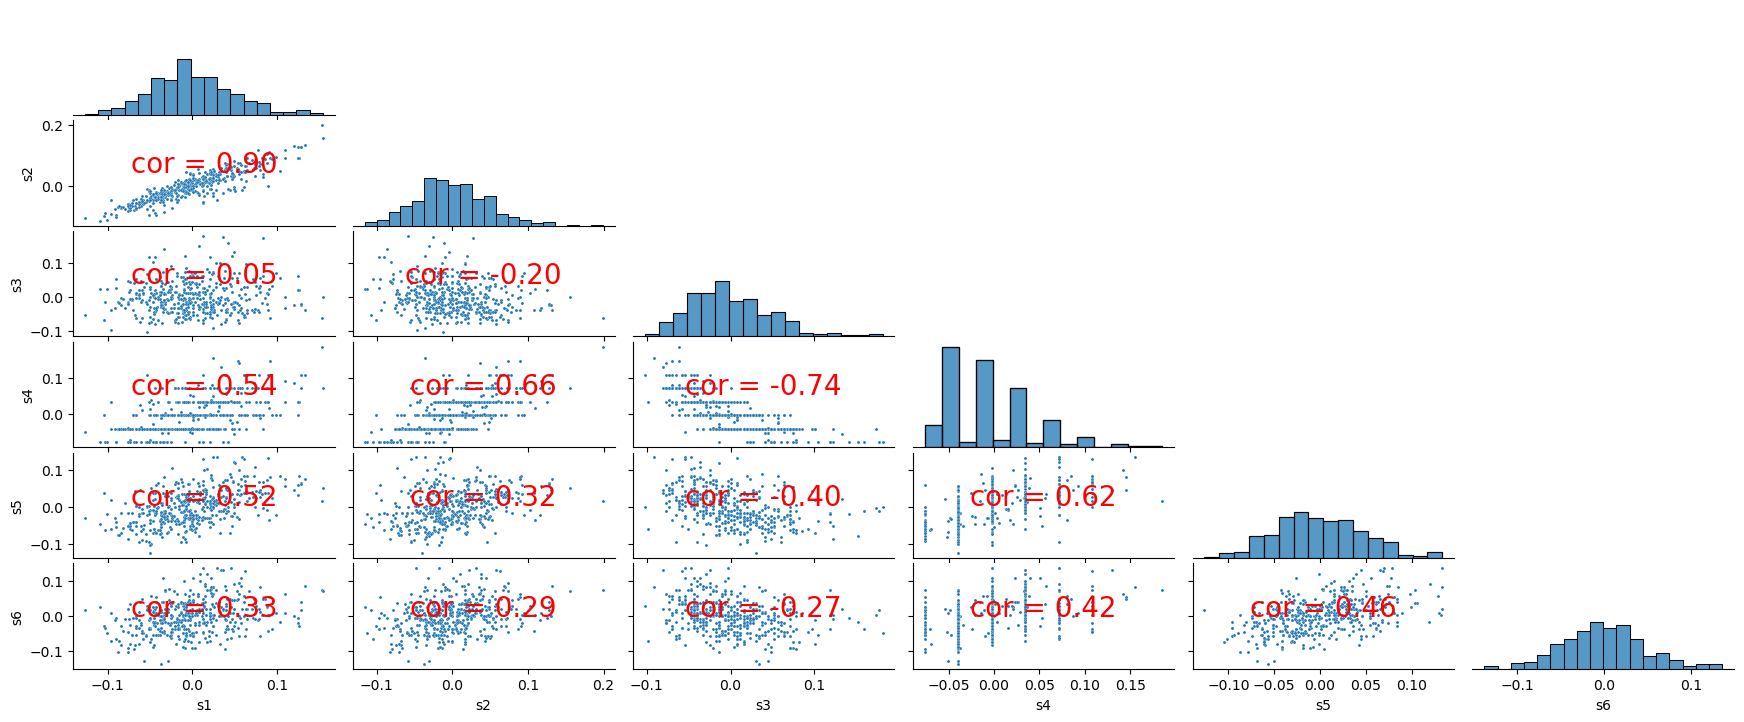

In [133]:
# Modifikation des Pair Plots (unter Ausnutzung, dass pairplot ein sog. pairgrid zurückliefert)
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    ax.text(s='cor = {:.2f}'.format( np.corrcoef(x,y)[0,1] ), x=0.5, y=0.5, ha="center", transform=ax.transAxes,
            color="red", size=20)

pairgrid = sns.pairplot ( df.iloc[:,-7:-1], plot_kws={"s":5}, corner=True )
pairgrid.map_lower ( reg_coef )
plt.gcf().set_size_inches ( 18, 7); plt.gcf().set_dpi(100);

### 3.4 Sensitivität gegenüber Outlier

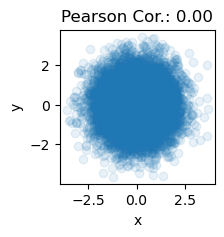

In [136]:
# Zufallszahlen und Korrelation
R  = np.random.default_rng(10)
x  = R.normal(loc=0, scale=1, size=10000)
y  = R.normal(loc=0, scale=1, size=10000)
xy = pd.DataFrame({"x":x,"y":y})
r  = xy.corr(method="pearson").iloc[0,1]

# Visualisierung
fig,ax=plt.subplots(figsize=[2,2])
plt.scatter(x,y,alpha=0.1)
plt.title("Pearson Cor.: {0:.2f}".format(r))
plt.xlabel("x")
plt.ylabel("y");


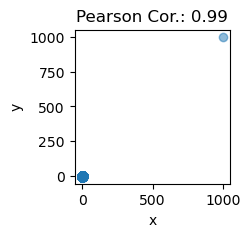

In [137]:
# Hinzufügen eines Outliers
x[0] = 1000
y[0] = 1000
xy   = pd.DataFrame({"x":x,"y":y})
r    = xy.corr(method="pearson").iloc[0,1]

# Visualisierung
fig,ax=plt.subplots(figsize=[2,2])
plt.scatter(x,y,alpha=0.5)
plt.title("Pearson Cor.: {0:.2f}".format(r))
plt.xlabel("x")
plt.ylabel("y");


**Fazit:**
- Die Korrelation misst den "Winkel" zwischen zwei Datenvektoren. Sie ist ein gutes Maß für den linearen Zusammenhang.
- *Korrelation does not imply causation*; umgekehrt: Nichtkorreliertheit impliziert nicht Unabhängigkeit.
- Speziell die Pearson-Korrelation ist sensitiv gegenüber dem Vorliegen von Outliern.
- Als nicht-sensitive Alternative kann die Spearman-Korrelation verwendet werden, die die Pearson-Korrelation der Ränge der Datenvektoren berechnet.
<br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [138]:
# Der Rang (engl. "rank") beinhaltet die
# Information, wie die Elemente angeordnet sind.
pd.Series([100,-1,10]).rank()


0    3.0
1    1.0
2    2.0
dtype: float64

In [139]:
# Pearson-Korrelation
xy.corr(method="pearson").iloc[0,1]


0.9900086060446665

In [140]:
# Spearman-Korrelation ...
xy.corr(method="spearman").iloc[0,1]


-0.0030459710584597108

In [141]:
# ... ist identisch zu Pearson angew. auf Ränge
xy.rank().corr(method="pearson").iloc[0,1]


-0.003045971058459647

### 3.5 Abschließend: Das Beispiel erneut mit Spearman-Korrelation

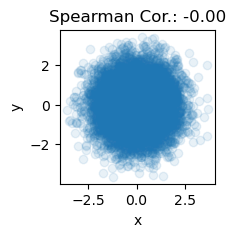

In [142]:
# Zufallszahlen und Korrelation
R  = np.random.default_rng(10)
x  = R.normal(loc=0, scale=1, size=10000)
y  = R.normal(loc=0, scale=1, size=10000)
xy = pd.DataFrame({"x":x,"y":y})
r  = xy.corr(method="spearman").iloc[0,1]

# Visualisierung
fig,ax=plt.subplots(figsize=[2,2])
plt.scatter(x,y,alpha=0.1)
plt.title("Spearman Cor.: {0:.2f}".format(r))
plt.xlabel("x")
plt.ylabel("y");


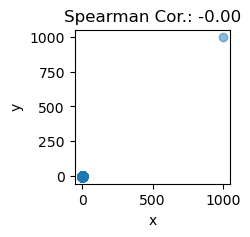

In [143]:
# Hinzufügen eines Outliers
x[0] = 1000
y[0] = 1000
xy   = pd.DataFrame({"x":x,"y":y})
r    = xy.corr(method="spearman").iloc[0,1]

# Visualisierung
fig,ax=plt.subplots(figsize=[2,2])
plt.scatter(x,y,alpha=0.5)
plt.title("Spearman Cor.: {0:.2f}".format(r))
plt.xlabel("x")
plt.ylabel("y");


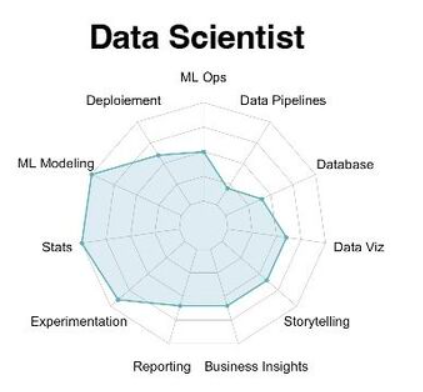

# <div style="color:gray;">1. Numpy</div>
# <div style="color:gray;">2. Best practices der Informationsvisualisierung</div>
# <div style="color:gray;">3. Korrelation</div>
# Vielen Dank für Ihre Aufmerksamkeit!